In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/Users/rahulmeena/Imarticus/GitHub/IMARTICUS/Datasets/class_exercise/Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [5]:
df=df.drop(["RowNumber","CustomerId","Surname"],axis=1)

In [6]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [7]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [8]:
df.value_counts(['Gender', 'Geography'])

Gender  Geography
Male    France       2753
Female  France       2261
Male    Spain        1388
        Germany      1316
Female  Germany      1193
        Spain        1089
Name: count, dtype: int64

In [9]:
df.value_counts(['Gender', 'Geography'])

Gender  Geography
Male    France       2753
Female  France       2261
Male    Spain        1388
        Germany      1316
Female  Germany      1193
        Spain        1089
Name: count, dtype: int64

In [10]:
# Bivariate analysis
f=pd.crosstab(df["Geography"],df["Exited"])
f

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


In [11]:
pd.crosstab(df["Geography"],df["Exited"],margins=True, margins_name="Total")

Exited,0,1,Total
Geography,,,
France,4204,810,5014
Germany,1695,814,2509
Spain,2064,413,2477
Total,7963,2037,10000


In [12]:
pd.crosstab(df["Geography"],df["Exited"],margins=True, margins_name="Total", normalize="index")

Exited,0,1
Geography,,
France,0.838452,0.161548
Germany,0.675568,0.324432
Spain,0.833266,0.166734
Total,0.796300,0.203700


In [13]:
from scipy.stats import chi2_contingency

In [14]:
chi2_contingency(f)

Chi2ContingencyResult(statistic=301.25533682434536, pvalue=3.8303176053541544e-66, dof=2, expected_freq=array([[3992.6482, 1021.3518],
       [1997.9167,  511.0833],
       [1972.4351,  504.5649]]))

### Numerical-Numerical

In [15]:
df.groupby("Exited").agg({"CreditScore": ['mean', 'median', min, max]})

CreditScore                 
              mean median  min  max
Exited                             
0       651.853196  653.0  405  850
1       645.351497  646.0  350  850

In [16]:
# T test Independence Sample -
# Null hypo-   Creditscore of left people = Credit score of non left people - ( no relation)
# Alternative --Creditscore of left people <> Credit score of non left people - (relation)
from scipy.stats import ttest_ind

In [17]:
left=df[df["Exited"]==1]
not_left=df[df["Exited"]==0]

In [18]:
ttest_ind(left["CreditScore"],not_left["CreditScore"])

TtestResult(statistic=-2.7100778888729833, pvalue=0.006738213892192373, df=9998.0)

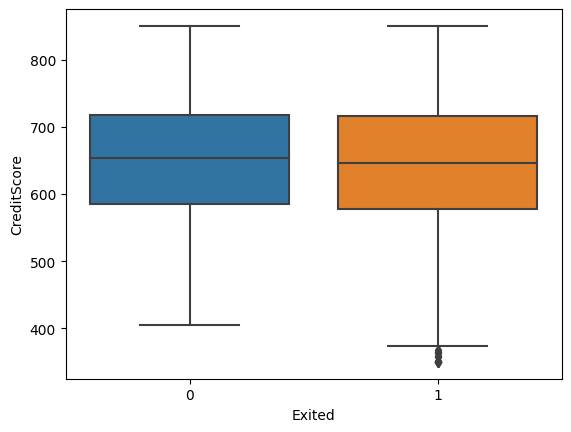

In [19]:
sns.boxplot(x="Exited",y="CreditScore",data=df)
plt.show()

### Feature Engineering

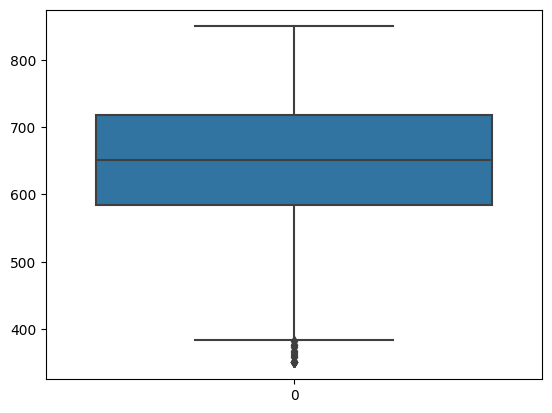

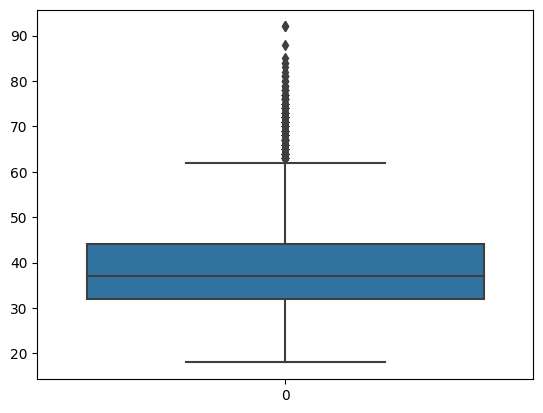

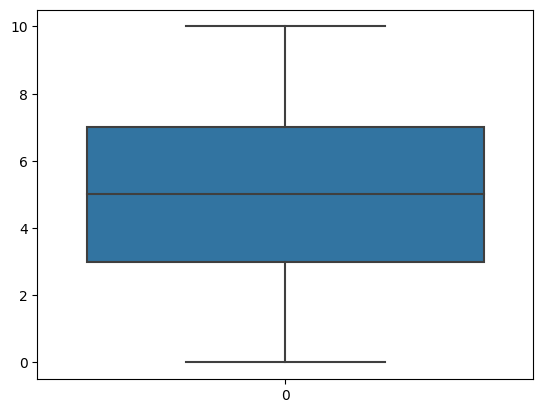

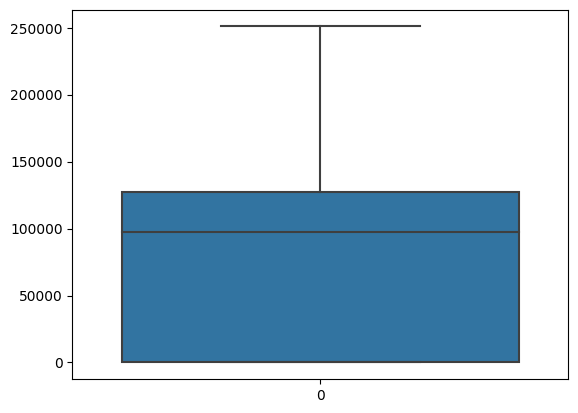

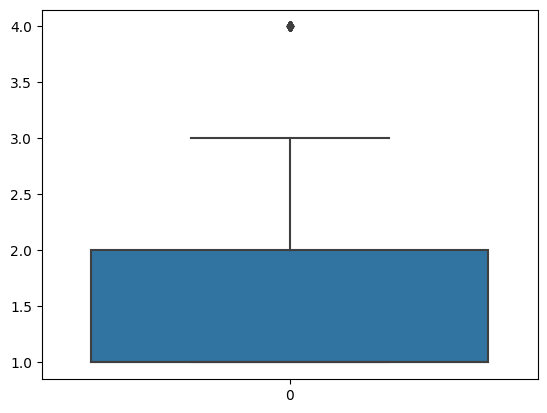

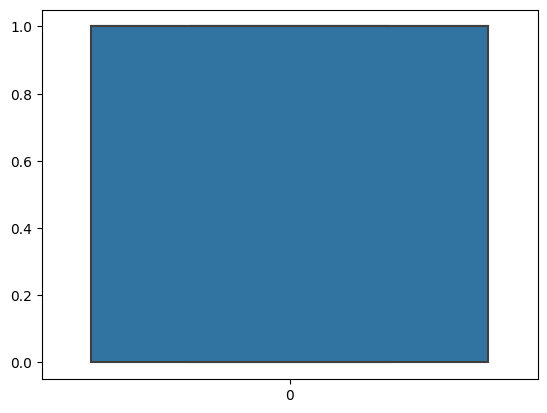

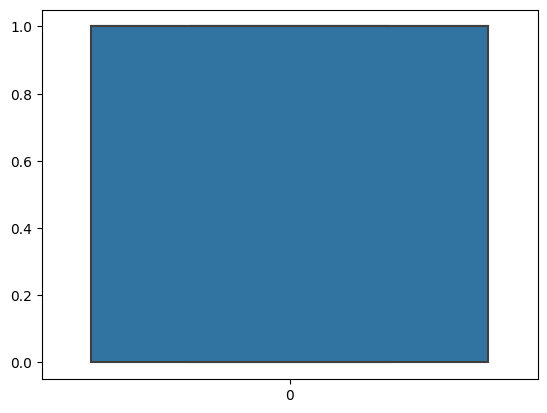

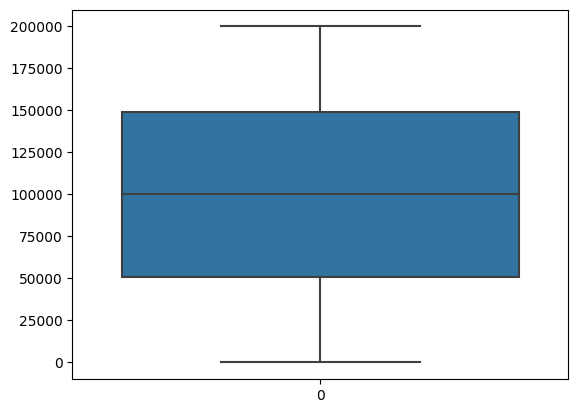

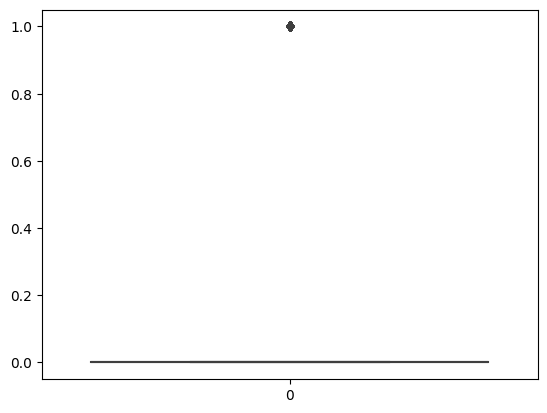

In [20]:
# outlier treatment
for i in df.columns:
  if df[i].dtypes=="int64" or df[i].dtypes=="float64":
    sns.boxplot(df[i])
    plt.show()

In [21]:
# dummy creation
df1=pd.get_dummies(df,columns=['Geography', "Gender"],drop_first=True, dtype="int")
df1

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


## Model Development

In [22]:
y=df1["Exited"]
x=df1.drop(["Exited"],axis=1)

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [24]:
# rescaling
std=StandardScaler()
std.fit(x_train)   # it is learning from the data
x_train1=pd.DataFrame(std.transform(x_train), columns=x_train.columns)
x_train1
x_test1=pd.DataFrame(std.transform(x_test), columns=x_test.columns)
x_test1

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,-0.583617,-0.656750,-0.688948,0.324894,0.819663,-1.548034,-1.030169,-1.023964,1.737346,-0.577790,0.910554
1,-0.303026,0.390286,-1.382503,-1.222055,0.819663,0.645981,0.970714,0.790096,-0.575591,-0.577790,0.910554
2,-0.531655,0.485471,-0.342170,-1.222055,0.819663,0.645981,-1.030169,-0.733048,-0.575591,1.730732,-1.098232
3,-1.518919,1.913248,1.044940,0.683891,0.819663,0.645981,0.970714,1.211571,1.737346,-0.577790,0.910554
4,-0.957737,-1.132675,0.698162,0.777369,-0.903352,0.645981,0.970714,0.240116,-0.575591,1.730732,-1.098232
...,...,...,...,...,...,...,...,...,...,...,...
2995,0.819336,0.009546,-1.035726,0.806485,-0.903352,0.645981,0.970714,-0.450516,-0.575591,1.730732,-1.098232
2996,-1.217544,-0.751935,0.698162,0.567168,0.819663,0.645981,0.970714,-1.119522,-0.575591,-0.577790,-1.098232
2997,-0.448517,-0.656750,0.698162,-0.072394,-0.903352,0.645981,0.970714,0.886280,-0.575591,-0.577790,0.910554
2998,-0.749893,-0.751935,-1.035726,-1.222055,0.819663,-1.548034,0.970714,-0.638471,-0.575591,-0.577790,0.910554


In [25]:
# training the LogisticRegression on our data
Logit=LogisticRegression()
Logit.fit(x_train1,y_train)

LogisticRegression()

In [26]:
# Model Evaluation
pred_train=Logit.predict(x_train1)
pred_test=Logit.predict(x_test1)

In [27]:
pd.DataFrame({"Act":y_train,"Pred":pred_train}).head(20)

,Act,Pred
9069,1,0
2603,0,0
7738,0,0
1579,0,0
5058,0,0
5753,0,0
3548,0,0
409,0,1
4097,0,0
6461,0,0


## Confusion Matrix

A confusion matrix is a performance measurement for classification models, showing how well the model is performing by comparing the actual target values to the model’s predictions. It provides a breakdown of the counts of true and false predictions for each class. Let's understand the components.

|                | Predicted Positive (1) | Predicted Negative (0) |
|----------------|------------------------|------------------------|
| **Actual Positive (1)** | True Positive (TP)         | False Negative (FN)        |
| **Actual Negative (0)** | False Positive (FP)        | True Negative (TN)         |


In [28]:
metrics.confusion_matrix(y_train, pred_train)

array([[5348,  199],
       [1130,  323]])

In [29]:
print(metrics.classification_report(y_train,pred_train))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      5547
           1       0.62      0.22      0.33      1453

    accuracy                           0.81      7000
   macro avg       0.72      0.59      0.61      7000
weighted avg       0.78      0.81      0.77      7000



In [30]:
print(metrics.classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2416
           1       0.54      0.20      0.29       584

    accuracy                           0.81      3000
   macro avg       0.69      0.58      0.59      3000
weighted avg       0.78      0.81      0.77      3000



In [31]:
prob_train=pd.DataFrame(Logit.predict_proba(x_train1), columns=["Prob_0","Prob_1"])
prob_test=pd.DataFrame(Logit.predict_proba(x_test1), columns=["Prob_0","Prob_1"])

In [32]:
new_pred_train=np.where(prob_train["Prob_1"]>0.2,1,0)
new_pred_test=np.where(prob_test["Prob_1"]>0.2,1,0)

In [33]:
print(metrics.classification_report(y_train,new_pred_train))

              precision    recall  f1-score   support

           0       0.90      0.69      0.78      5547
           1       0.37      0.71      0.49      1453

    accuracy                           0.69      7000
   macro avg       0.64      0.70      0.64      7000
weighted avg       0.79      0.69      0.72      7000



In [34]:
print(metrics.classification_report(y_test,new_pred_test))

              precision    recall  f1-score   support

           0       0.91      0.68      0.78      2416
           1       0.35      0.72      0.47       584

    accuracy                           0.69      3000
   macro avg       0.63      0.70      0.63      3000
weighted avg       0.80      0.69      0.72      3000



In [35]:
pd.DataFrame({"Act":y_test,"Pred":new_pred_test}).head(20)

,Act,Pred
6252,0,1
4684,0,0
1731,0,1
4742,0,1
4521,0,0
6340,0,0
576,0,1
5202,1,1
6363,0,1
439,0,1


In [36]:
Logit.score(x_train1,y_train)  # to check the accuracy only

0.8101428571428572

In [37]:
Logit.score(x_test1,y_test) # to check the accuracy only

0.8113333333333334

In [38]:
metrics.recall_score(y_train,new_pred_train)  # train recall

0.7102546455609084

In [39]:
# roc and auc
fpr, tpr, thresholds = metrics.roc_curve(y_train, prob_train["Prob_1"])
auc=metrics.roc_auc_score(y_train, prob_train["Prob_1"])

In [40]:
auc

0.765100484615544

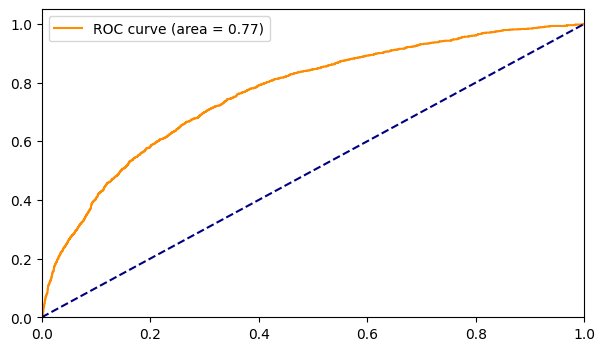

In [41]:
# roc and auc
fpr, tpr, thresholds = metrics.roc_curve(y_train, prob_train["Prob_1"])
auc=metrics.roc_auc_score(y_train, prob_train["Prob_1"])

plt.figure(figsize=(7,4))
plt.plot(fpr, tpr,color='darkorange',label='ROC curve (area = %0.2f)'%auc)
plt.plot([0,1],[0,1],color='navy',linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.legend()
plt.show()

In [42]:
Logit.coef_

array([[-0.07551085,  0.74744967, -0.06203306,  0.1718285 , -0.04343549,
        -0.02944133, -0.52286886,  0.00435896,  0.33416987,  0.0384973 ,
        -0.26460557]])

In [43]:
x_train1.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,-0.344595,-0.65675,-0.342170,1.583725,0.819663,0.645981,0.970714,1.248214,-0.575591,1.730732,-1.098232
1,-0.095181,-0.46638,0.698162,1.344106,-0.903352,-1.548034,0.970714,1.521225,1.737346,-0.577790,-1.098232


In [45]:
# Explainable AI -shape value, cassual inference

In [46]:
# creating new dataset to predict whether person will exit or not
new_data=pd.DataFrame({"CreditScore":[820],
              "Age":[65],
              "Tenure":[10],
              "Balance":[12000],
              "NumOfProducts":[3],
              "HasCrCard":[1],
              "IsActiveMember":[1],
              "EstimatedSalary":[8000],
              "Geography_Germany":[0],
              "Geography_Spain":[0],
              "Gender_Male":[1]
              })

In [47]:
new=pd.DataFrame(std.transform(new_data), columns=new_data.columns)
new

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,1.744246,2.484358,1.738495,-1.030104,2.542677,0.645981,0.970714,-1.61,-0.575591,-0.57779,0.910554


In [48]:
Logit.predict_proba(new)

array([[0.78228601, 0.21771399]])

In [49]:
pd.DataFrame(Logit.coef_, columns=x_train1.columns)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,-0.075511,0.74745,-0.062033,0.171829,-0.043435,-0.029441,-0.522869,0.004359,0.33417,0.038497,-0.264606
